In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [3]:
df=pd.read_csv('fifa.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
#Dropping the unwanted columns:
df.drop(['Photo','Flag','Club Logo','Jersey Number'],axis=1,inplace=True)

In [5]:
#percentage of null values:
df.isnull().sum()/len(df)*100

ID                           0.000000
Name                         0.000000
Age                          0.000000
Nationality                  0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing                    0.263635
HeadingAccuracy              0.263635
ShortPassing                 0.263635
Volleys                      0.263635
Dribbling   

In [6]:
#Loaned From dropping because 93% of values are missing
df.drop('Loaned From',axis=1,inplace=True)

In [9]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,"Jul 1, 2004",2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,"Jul 10, 2018",2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,"Aug 3, 2017",2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,"Jul 1, 2011",2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,"Aug 30, 2015",2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [9]:
#Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.
#Convert to Float after getting rid of currency symbol and suffix.
def cash_convert(s):
    d={'m':6,'k':3}
    a=[]
 
    for i in s:
        if type(i)==float:
            a.append(i)
            continue        
        if i[0].isdigit()!=True:
            i=i[1:]
    #        print(i)
        if '.' in i and i[-1].isalpha():
            ind=i.index('.')
    #        print(i)
            i=i[:ind]+i[ind+1:-1]+'0'*d[i[-1].lower()]
    #        print(i)   
        elif i[-1].isalpha():
    #        print(i)
            i=i[:-1]+'0'*d[i[-1].lower()]
        else:
            pass

        a.append(i)
    return a
#print(a,len(a))




In [11]:
#'Value'
#Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.
#Convert to Float after getting rid of currency symbol and suffix.
df['Value']=cash_convert(df['Value'])
df['Value']

0        1105000000
1          77000000
2        1185000000
3          72000000
4         102000000
            ...    
18202         60000
18203         60000
18204         60000
18205         60000
18206         60000
Name: Value, Length: 18207, dtype: object

In [12]:
df['Value']=df['Value'].astype('float')

In [13]:
#'Wage'
#Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.
#Convert to Float after getting rid of currency symbol and suffix.
df['Wage']=cash_convert(df['Wage'])

In [14]:
df['Wage']=df['Wage'].astype('float')

In [15]:
#'Release Clause'
#Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.
#Convert to Float after getting rid of currency symbol and suffix.
df['Release Clause']=cash_convert(df['Release Clause'])

In [16]:
df['Release Clause']=df['Release Clause'].astype(float)

In [17]:
df['Release Clause'].isnull().sum()

1564

In [7]:
df['Joined']

0         Jul 1, 2004
1        Jul 10, 2018
2         Aug 3, 2017
3         Jul 1, 2011
4        Aug 30, 2015
             ...     
18202     May 3, 2017
18203    Mar 19, 2018
18204     Jul 1, 2017
18205    Apr 24, 2018
18206    Oct 30, 2018
Name: Joined, Length: 18207, dtype: object

In [10]:
#'Joined'
#Year as a string, in some cases complete date as string
#Convert to int with only year
def ext_yr(s):
    b=[]
    for i in s:
            if type(i)==float:
                b.append(i)
                continue 
            i=i[-4:]
            b.append(i)
    return b

In [13]:
df['Joined']=ext_yr(df['Joined'])
df['Joined']

0        2004
1        2018
2        2017
3        2011
4        2015
         ... 
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: Joined, Length: 18207, dtype: object

In [20]:
df['Joined'].fillna(df['Joined'].median(),inplace=True)
df['Joined']=df['Joined'].astype('int32')

In [113]:
#'Contract Valid Until'
#Date as a string 
#Convert to datetime type
df['Contract Valid Until']=ext_yr(df['Contract Valid Until'])
df['Contract Valid Until']=df['Contract Valid Until'].fillna(df['Contract Valid Until'].median(),downcast ='int32')

In [21]:
df['Contract Valid Until']=pd.to_datetime(df['Contract Valid Until'])
df['Contract Valid Until']

0       2021-01-01
1       2022-01-01
2       2022-01-01
3       2020-01-01
4       2023-01-01
           ...    
18202   2019-01-01
18203   2020-01-01
18204   2021-01-01
18205   2019-01-01
18206   2019-01-01
Name: Contract Valid Until, Length: 18207, dtype: datetime64[ns]

In [22]:
#'Height'
#In inches with a quotation mark 
#Convert to Float with decimal points

df['Height']=df['Height'].replace("'",".",regex=True).astype(float)

In [23]:
#'Weight'
#Contains the suffix lbs 
#Remove the suffix and convert to float
df['Weight']=df['Weight'].replace("lbs","",regex=True).astype(float)

In [24]:
# Missing value imputaion
a=df.isnull().sum()/len(df)*100
a[a>0]

Club                        1.323667
Preferred Foot              0.263635
International Reputation    0.263635
Weak Foot                   0.263635
Skill Moves                 0.263635
Work Rate                   0.263635
Body Type                   0.263635
Position                    0.329544
Contract Valid Until        1.587302
Height                      0.263635
Weight                      0.263635
Crossing                    0.263635
Finishing                   0.263635
HeadingAccuracy             0.263635
ShortPassing                0.263635
Volleys                     0.263635
Dribbling                   0.263635
Curve                       0.263635
FKAccuracy                  0.263635
LongPassing                 0.263635
BallControl                 0.263635
Acceleration                0.263635
SprintSpeed                 0.263635
Agility                     0.263635
Reactions                   0.263635
Balance                     0.263635
ShotPower                   0.263635
J

In [25]:
c=df.isnull().sum(axis=1)
print(c.shape)
c=c[c>30].index
print(c.shape)

(18207,)
(48,)


In [26]:
df.drop(c,inplace=True)

In [27]:
cat_df=df.select_dtypes(exclude=np.number)

In [28]:
num_df=df.select_dtypes(include=np.number)

In [29]:
cat_df.isnull().sum()/len(cat_df)*100

Name                    0.000000
Nationality             0.000000
Club                    1.327166
Preferred Foot          0.000000
Work Rate               0.000000
Body Type               0.000000
Position                0.066083
Contract Valid Until    1.327166
dtype: float64

C:\Users\Vivek\AppData\Local\Temp/ipykernel_13712/3972182373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Club']=cat_df['Club'].fillna('No Club')


<AxesSubplot:>

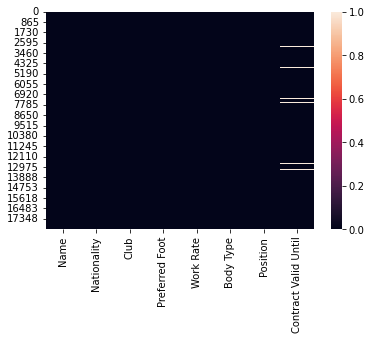

In [30]:
# missing value treatement in catogorical cols
cat_df['Club']=cat_df['Club'].fillna('No Club')
sns.heatmap(cat_df.isnull())

In [31]:
cat_df[cat_df['Position'].isnull()]
cat_df['Position']=cat_df['Position'].fillna('NA')


C:\Users\Vivek\AppData\Local\Temp/ipykernel_13712/3991970065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Position']=cat_df['Position'].fillna('NA')


In [32]:
cat_df.isnull().sum()/len(cat_df)*100

Name                    0.000000
Nationality             0.000000
Club                    0.000000
Preferred Foot          0.000000
Work Rate               0.000000
Body Type               0.000000
Position                0.000000
Contract Valid Until    1.327166
dtype: float64

In [33]:
# Missing value treatment in  Numeric values
cat_df

,Name,Nationality,Club,Preferred Foot,Work Rate,Body Type,Position,Contract Valid Until
0,L. Messi,Argentina,FC Barcelona,Left,Medium/ Medium,Messi,RF,2021-01-01
1,Cristiano Ronaldo,Portugal,Juventus,Right,High/ Low,C. Ronaldo,ST,2022-01-01
2,Neymar Jr,Brazil,Paris Saint-Germain,Right,High/ Medium,Neymar,LW,2022-01-01
3,De Gea,Spain,Manchester United,Right,Medium/ Medium,Lean,GK,2020-01-01
4,K. De Bruyne,Belgium,Manchester City,Right,High/ High,Normal,RCM,2023-01-01
...,...,...,...,...,...,...,...,...
18202,J. Lundstram,England,Crewe Alexandra,Right,Medium/ Medium,Lean,CM,2019-01-01
18203,N. Christoffersson,Sweden,Trelleborgs FF,Right,Medium/ Medium,Normal,ST,2020-01-01
18204,B. Worman,England,Cambridge United,Right,Medium/ Medium,Normal,ST,2021-01-01
18205,D. Walker-Rice,England,Tranmere Rovers,Right,Medium/ Medium,Lean,RW,2019-01-01


In [35]:
num_df.isnull().sum()/len(num_df)*100

ID                          0.0
Age                         0.0
Overall                     0.0
Potential                   0.0
Value                       0.0
Wage                        0.0
International Reputation    0.0
Weak Foot                   0.0
Skill Moves                 0.0
Joined                      0.0
Height                      0.0
Weight                      0.0
Crossing                    0.0
Finishing                   0.0
HeadingAccuracy             0.0
ShortPassing                0.0
Volleys                     0.0
Dribbling                   0.0
Curve                       0.0
FKAccuracy                  0.0
LongPassing                 0.0
BallControl                 0.0
Acceleration                0.0
SprintSpeed                 0.0
Agility                     0.0
Reactions                   0.0
Balance                     0.0
ShotPower                   0.0
Jumping                     0.0
Stamina                     0.0
Strength                    0.0
LongShot

In [34]:
num_df

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Joined,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,31,94,94,1.105000e+09,565000.0,5.0,4.0,4.0,2004,5.70,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2.265000e+09
1,20801,33,94,94,7.700000e+07,405000.0,5.0,4.0,5.0,2018,6.20,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1.271000e+09
2,190871,26,92,93,1.185000e+09,290000.0,5.0,5.0,5.0,2017,5.90,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,2.281000e+09
3,193080,27,91,93,7.200000e+07,260000.0,4.0,3.0,1.0,2011,6.40,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1.386000e+09
4,192985,27,91,92,1.020000e+08,355000.0,4.0,5.0,4.0,2015,5.11,154.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1.964000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,47,65,6.000000e+04,1000.0,1.0,2.0,2.0,2017,5.90,134.0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,1.430000e+05
18203,243165,19,47,63,6.000000e+04,1000.0,1.0,2.0,2.0,2018,6.30,170.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,1.130000e+05
18204,241638,16,47,67,6.000000e+04,1000.0,1.0,3.0,2.0,2017,5.80,148.0,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,1.650000e+05
18205,246268,17,47,66,6.000000e+04,1000.0,1.0,3.0,2.0,2018,5.10,154.0,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,1.430000e+05


In [35]:
num_df['Release Clause']=num_df['Release Clause'].fillna(df.groupby('Position')['Release Clause'].transform('mean'))

C:\Users\Vivek\AppData\Local\Temp/ipykernel_13712/216977927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df['Release Clause']=num_df['Release Clause'].fillna(df.groupby('Position')['Release Clause'].transform('mean'))


In [37]:
print(num_df.shape)
print(cat_df.shape)

(18159, 47)
(18159, 8)


In [38]:
df=cat_df.join(num_df)

Exploratory Analysis:

1.	Plot the distribution of Overall rating for all players. 
2.	Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause
3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.
a)	What would the average wage for this set of players be?
b)	What is the average age?
c)	Is there a correlation between the Overall rating and Value for these players?

4.	Generate tables containing the top 5 players by Overall rating for each unique position.


<AxesSubplot:ylabel='Density'>

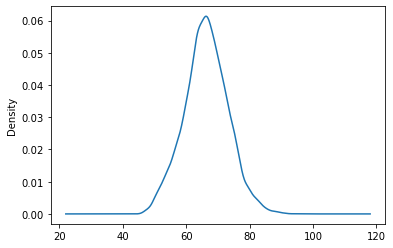

In [42]:
# Plot the distribution of Overall rating for all players.
df['Overall'].plot(kind='kde')

#### The overall rating is a normally distributed feature

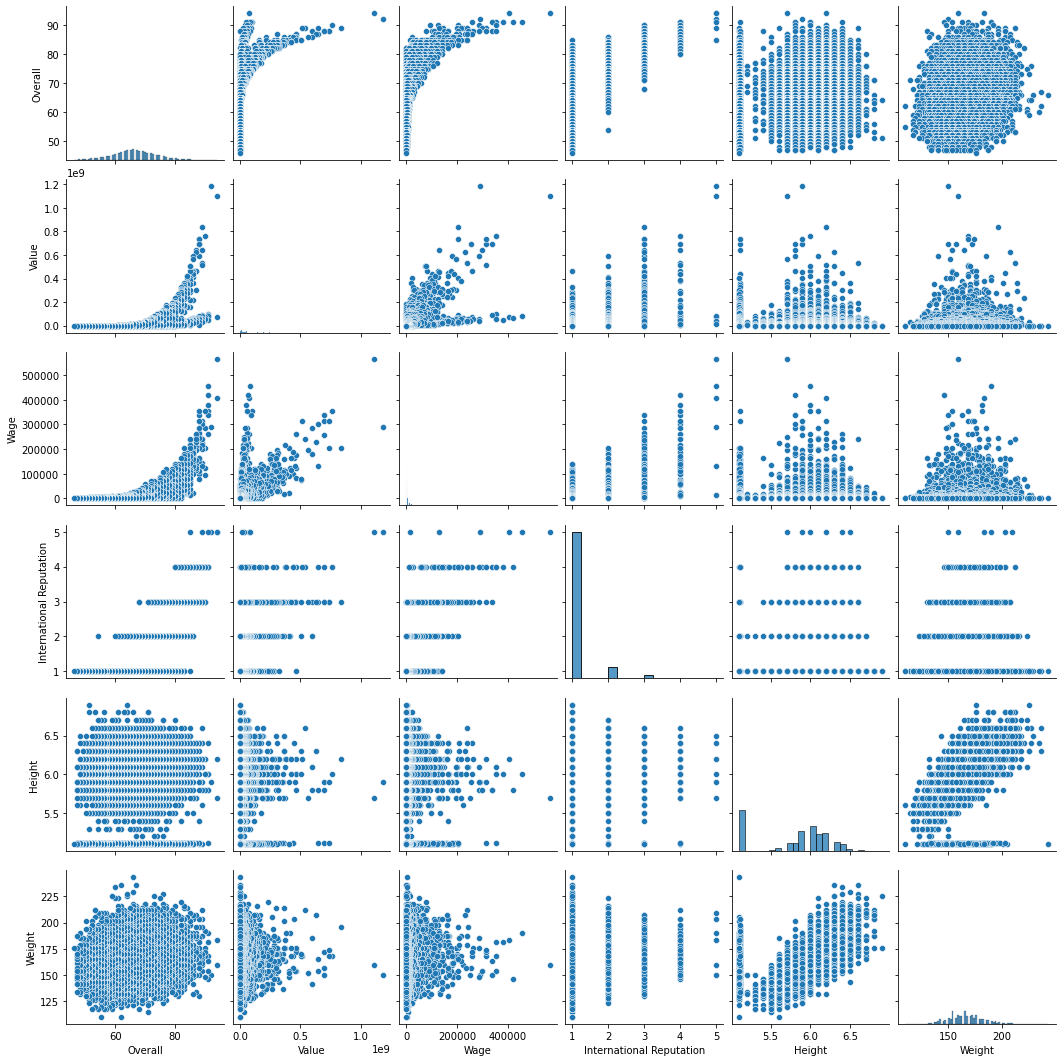

In [41]:
sns.pairplot(df[['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']])

1. wage and release_clause have strong linear association
2. height and weight have strong linear association
3. wage and value have positive assiciation
4. release_clause and value have positive assiciation

### Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020. 
### a) What would the average wage for this set of players be? 
### b) What is the average age? 
### c) Is there a correlation between the Overall rating and Value for these players?



In [40]:
top_20=df[df['Contract Valid Until'].dt.year==2020].sort_values(by='Overall',ascending=False).head(20)
top_20

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,2011,2020-01-01,6.40,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1386000000
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,4.0,4.0,4.0,High/ High,Lean,RCM,2012,2020-01-01,5.80,146.0,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,1374000000
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,4.0,3.0,3.0,High/ Medium,Normal,RCB,2005,2020-01-01,6.00,181.0,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,1046000000
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,4.0,4.0,4.0,High/ Medium,Normal,LF,2012,2020-01-01,5.80,163.0,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,1721000000
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,4.0,2.0,4.0,High/ Medium,Normal,LCM,2010,2020-01-01,5.80,148.0,84.0,76.0,54.0,93.0,82.0,89.0,82.0,77.0,87.0,94.0,70.0,64.0,92.0,90.0,90.0,72.0,64.0,78.0,52.0,75.0,57.0,50.0,89.0,92.0,75.0,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000
21,179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,60000000.0,200000.0,Right,4.0,4.0,3.0,High/ High,Lean,LS,2013,2020-01-01,6.10,170.0,70.0,89.0,89.0,78.0,90.0,80.0,77.0,76.0,52.0,82.0,75.0,76.0,77.0,91.0,59.0,87.0,88.0,92.0,78.0,79.0,84.0,48.0,93.0,77.0,85.0,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,4.0,3.0,2.0,Medium/ High,Normal,LCB,2005,2020-01-01,6.20,187.0,58.0,33.0,83.0,59.0,45.0,58.0,60.0,31.0,59.0,57.0,63.0,75.0,54.0,82.0,55.0,78.0,89.0,65.0,89.0,49.0,92.0,88.0,28.0,50.0,50.0,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,446000000
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,735000000.0,205000.0,Right,3.0,5.0,4.0,High/ Medium,Lean,CAM,2013,2020-01-01,5.11,168.0,88.0,80.0,52.0,91.0,77.0,84.0,86.0,87.0,88.0,91.0,75.0,73.0,79.0,88.0,81.0,84.0,50.0,92.0,58.0,89.0,46.0,56.0,83.0,91.0,67.0,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,1415000000
39,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,24000000.0,165000.0,Right,4.0,3.0,2.0,Medium/ High,Normal,RCB,2012,2020-01-01,6.00,181.0,60.0,38.0,81.0,80.0,63.0,62.0,61.0,64.0,80.0,80.0,70.0,72.0,68.0,82.0,68.0,71.0,90.0,74.0,82.0,68.0,76.0,89.0,59.0,72.0,60.0,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,444000000
50,175943,D. Mertens,31,Belgium,87,87,Napoli,45000000.0,135000.0,Right,3.0,4.0,4.0,High/ Low,Normal,RF,2013,2020-01-01,5.70,134.0,77.0,86.0,35.0,82.0,70.0,91.0,82.0,79.0,74.0,89.0,93.0,85.0,94.0,88.0,92.0,80.0,60.0,75.0,42.0,81.0,59.0,36.0,87.0,83.0,79.0,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,765000000


In [48]:
top_20['Wage'].mean()

205450.0

In [49]:
top_20['Age'].mean()

30.65

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Joined,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
ID,1.000000,-0.739162,-0.417354,0.046577,-0.106822,-0.204653,-0.356191,-0.075784,-0.056914,0.214557,-0.054169,-0.191425,-0.131994,-0.082323,-0.106815,-0.136279,-0.159915,-0.030340,-0.169511,-0.199549,-0.186764,-0.100184,0.133236,0.132437,-0.019897,-0.408617,0.048463,-0.166133,-0.169369,-0.053895,-0.259756,-0.161549,-0.228329,-0.160602,-0.088330,-0.215170,-0.140657,-0.384473,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778
Age,-0.739162,1.000000,0.453069,-0.252281,0.058910,0.141306,0.253765,0.059867,0.027649,-0.213842,0.053237,0.230213,0.130545,0.068660,0.147183,0.132894,0.142472,0.010166,0.143276,0.193467,0.181310,0.084969,-0.158667,-0.151682,-0.019395,0.453124,-0.089877,0.156947,0.177167,0.097793,0.332798,0.155096,0.265190,0.197845,0.082443,0.187422,0.139535,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313
Overall,-0.417354,0.453069,1.000000,0.661180,0.499572,0.571720,0.499491,0.212015,0.414463,-0.163679,0.040794,0.154634,0.394972,0.332515,0.340776,0.502550,0.391338,0.372426,0.419491,0.396892,0.483909,0.460197,0.196869,0.210647,0.264952,0.850045,0.103160,0.441118,0.264435,0.365656,0.349326,0.420795,0.395470,0.321326,0.356493,0.498894,0.341429,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276
Potential,0.046577,-0.252281,0.661180,1.000000,0.458083,0.486604,0.372993,0.162346,0.354290,-0.034472,0.013937,-0.006947,0.246319,0.243355,0.200988,0.369189,0.254906,0.315019,0.279944,0.230544,0.321437,0.354396,0.234608,0.236771,0.222310,0.513425,0.138025,0.288318,0.109151,0.202563,0.075769,0.266740,0.171174,0.154908,0.245616,0.348141,0.224281,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341
Value,-0.106822,0.058910,0.499572,0.458083,1.000000,0.623492,0.454649,0.134772,0.264022,-0.078063,0.008695,0.033088,0.211863,0.209650,0.152528,0.271076,0.235255,0.228060,0.241345,0.221563,0.252284,0.257700,0.142778,0.143827,0.161905,0.431399,0.095574,0.234275,0.083713,0.175257,0.098425,0.235310,0.149122,0.118884,0.214564,0.291482,0.194791,0.366372,0.113887,0.094844,0.077349,-0.033054,-0.031571,-0.031964,-0.031807,-0.033406
Wage,-0.204653,0.141306,0.571720,0.486604,0.623492,1.000000,0.668635,0.140849,0.263205,-0.139610,0.023291,0.064776,0.232834,0.217439,0.187967,0.296691,0.257357,0.237150,0.259550,0.236385,0.276762,0.277615,0.124985,0.130315,0.156287,0.495560,0.088873,0.258351,0.129691,0.177562,0.139360,0.249084,0.194581,0.157415,0.226775,0.315395,0.222440,0.419597,0.145594,0.126291,0.111025,-0.025595,-0.025177,-0.028325,-0.025489,-0.025992
International Reputation,-0.356191,0.253765,0.499491,0.372993,0.454649,0.668635,1.000000,0.128317,0.208153,-0.135011,0.028510,0.088340,0.191770,0.178373,0.157483,0.242803,0.243089,0.179041,0.233681,0.223564,0.239525,0.217946,0.044319,0.044070,0.100869,0.445614,0.050076,0.227772,0.120931,0.094780,0.131280,0.213960,0.173327,0.129586,0.183003,0.284600,0.218620,0.392787,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444
Weak Foot,-0.075784,0.059867,0.212015,0.162346,0.134772,0.140849,0.128317,1.000000,0.340721,-0.011962,-0.122047,-0.130724,0.307925,0.357416,0.183238,0.322133,0.357340,0.352658,0.345468,0.330472,0.277174,0.356383,0.261435,0.248822,0.302062,0.201341,0.254022,0.332855,0.069752,0.232094,-0.008470,0.355967,0.131524,0.053097,0.346896,0.337897,0.330252,0.278132,0.065673,0.042646,0.026105,-0.231905,-0.233098,-0.229395,-0.231298,-0.232574
Skill Moves,-0.056914,0.027649,0.414463,0.354290,0.264022,0.26320

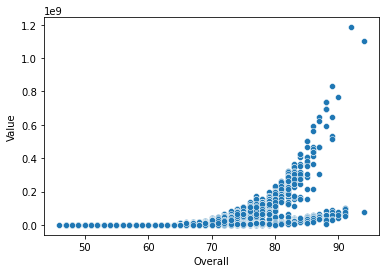

In [50]:
sns.scatterplot(x=num_df['Overall'],y=num_df['Value'])

num_df.corr()

There was medium positive association between overall and value

## Generate tables containing the top 5 players by Overall rating for each unique position.

In [51]:
pos=df['Position'].unique()
tab=[]

In [52]:
for i in  pos:
    globals()[f'tab_{i}']=df[df['Position']==i].sort_values(by='Overall',ascending=False).head()
    tab.append(globals() [f'tab_{i}'])

In [53]:
z=pd.concat(tab)
z.head(100)

,Name,Nationality,Club,Preferred Foot,Work Rate,Body Type,Position,Contract Valid Until,Release Clause,ID,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Joined,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,Argentina,FC Barcelona,Left,Medium/ Medium,Messi,RF,2021-01-01,2265000000,158023,31,94,94,1.105000e+09,565000.0,5.0,4.0,4.0,2004,5.70,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
50,D. Mertens,Belgium,Napoli,Right,High/ Low,Normal,RF,2020-01-01,765000000,175943,31,87,87,4.500000e+07,135000.0,3.0,4.0,4.0,2013,5.70,134.0,77.0,86.0,35.0,82.0,70.0,91.0,82.0,79.0,74.0,89.0,93.0,85.0,94.0,88.0,92.0,80.0,60.0,75.0,42.0,81.0,59.0,36.0,87.0,83.0,79.0,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0
528,D. Valeri,Argentina,Portland Timbers,Right,High/ Medium,Lean,RF,2018-01-01,173000000,172114,32,80,80,1.150000e+08,12000.0,2.0,3.0,3.0,2013,5.10,165.0,78.0,80.0,70.0,79.0,75.0,78.0,80.0,79.0,76.0,82.0,62.0,60.0,72.0,80.0,73.0,85.0,68.0,82.0,63.0,84.0,53.0,36.0,84.0,82.0,79.0,83.0,39.0,40.0,30.0,15.0,15.0,8.0,10.0,12.0
890,L. Podolski,Germany,Vissel Kobe,Left,Medium/ Low,Normal,RF,2019-01-01,81000000,150516,33,78,78,6.500000e+07,11000.0,3.0,3.0,4.0,2017,6.00,183.0,75.0,77.0,66.0,76.0,88.0,78.0,80.0,75.0,67.0,78.0,76.0,75.0,67.0,76.0,70.0,92.0,71.0,70.0,83.0,80.0,70.0,36.0,75.0,79.0,83.0,79.0,54.0,39.0,39.0,10.0,9.0,16.0,9.0,9.0
1774,C. Ciano,Italy,Frosinone,Left,High/ Medium,Normal,RF,2021-01-01,117000000,201313,28,75,75,6.500000e+07,17000.0,1.0,4.0,4.0,2017,5.90,161.0,72.0,70.0,60.0,73.0,67.0,76.0,75.0,76.0,70.0,77.0,87.0,75.0,82.0,71.0,78.0,70.0,55.0,68.0,62.0,71.0,51.0,25.0,67.0,72.0,70.0,74.0,24.0,23.0,20.0,9.0,12.0,9.0,9.0,7.0
1,Cristiano Ronaldo,Portugal,Juventus,Right,High/ Low,C. Ronaldo,ST,2022-01-01,1271000000,20801,33,94,94,7.700000e+07,405000.0,5.0,4.0,5.0,2018,6.20,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
10,R. Lewandowski,Poland,FC Bayern München,Right,High/ Medium,Normal,ST,2021-01-01,1271000000,188545,29,90,90,7.700000e+07,205000.0,4.0,4.0,4.0,2014,6.00,176.0,62.0,91.0,85.0,83.0,89.0,85.0,77.0,86.0,65.0,89.0,77.0,78.0,78.0,90.0,78.0,88.0,84.0,78.0,84.0,84.0,80.0,39.0,91.0,77.0,88.0,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0
16,H. Kane,England,Tottenham Hotspur,Right,High/ High,Normal,ST,2024-01-01,1607000000,202126,24,89,91,8.350000e+08,205000.0,3.0,4.0,3.0,2010,6.20,196.0,75.0,94.0,85.0,80.0,84.0,80.0,78.0,68.0,82.0,84.0,68.0,72.0,71.0,91.0,71.0,88.0,78.0,89.0,84.0,85.0,76.0,35.0,93.0,80.0,90.0,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0
23,S. Agüero,Argentina,Manchester City,Right,High/ Medium,Stocky,ST,2021-01-01,1193000000,153079,30,89,89,6.450000e+08,300000.0,4.0,4.0,4.0,2011,5.80,154.0,70.0,93.0,77.0,81.0,85.0,89.0,82.0,73.0,64.0,89.0,88.0,80.0,86.0,90.0,91.0,88.0,81.0,76.0,73.0,83.0,65.0,24.0,92.0,83.0,83.0,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0
36,G. Bale,Wales,Real Madrid,Left,High/ Medium,Lean,ST,2022-01-01,123000000,173731,28,88,88,6.000000e+07,355000.0,4.0,3.0,4.0,2013,6.10,181.0,87.0,86.0,84.0,85.0,85.0,87.0,90.0,87.0,80.0,85.0,94.0,95.0,82.0,85.0,65.0,92.0,87.0,75.0,80.0,91.0,65.0,59.0,85.0,79.0,76.0,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0


a)	Are there any players appearing in more than one Table. Please point out such players.


In [54]:
z[z['Name'].duplicated()==True]

,Name,Nationality,Club,Preferred Foot,Work Rate,Body Type,Position,Contract Valid Until,Release Clause,ID,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Joined,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes


###  No players are appering in multiple table


b)	What is the average wage one can expect to pay for the top 5 in every position?


In [55]:
z.groupby('Position')['Wage'].mean()



Position
CAM    174000.0
CB     139600.0
CDM    217000.0
CF      47400.0
CM     130600.0
GK     192800.0
LAM     81600.0
LB     177200.0
LCB    162000.0
LCM    184400.0
LDM    126600.0
LF     121200.0
LM     164600.0
LS     130200.0
LW     261000.0
LWB     34200.0
NA          0.0
RAM     45400.0
RB     155400.0
RCB    231000.0
RCM    240800.0
RDM    105000.0
RF     148000.0
RM     131400.0
RS     132200.0
RW     202000.0
RWB     44200.0
ST     294000.0
Name: Wage, dtype: float64

<AxesSubplot:xlabel='Position'>

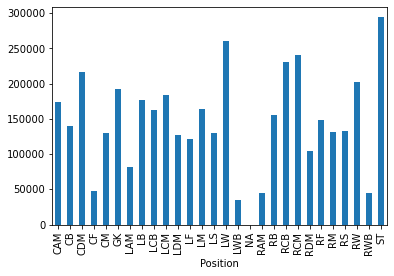

In [56]:
z.groupby('Position')['Wage'].mean().plot(kind='bar')

C:\Users\SUREND~1\AppData\Local\Temp/ipykernel_10804/852118413.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


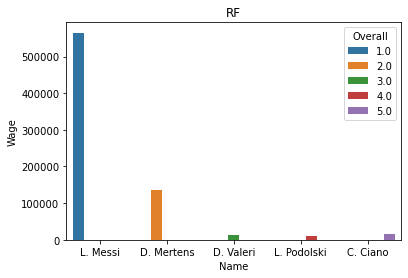

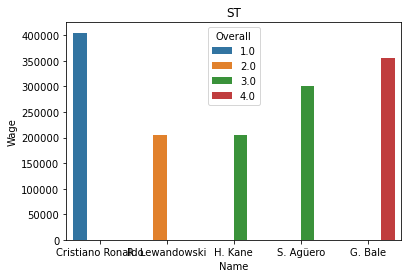

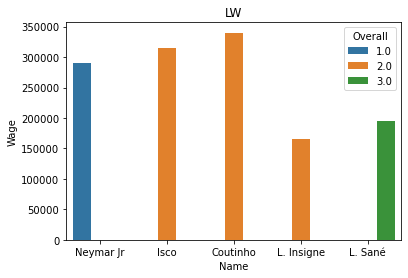

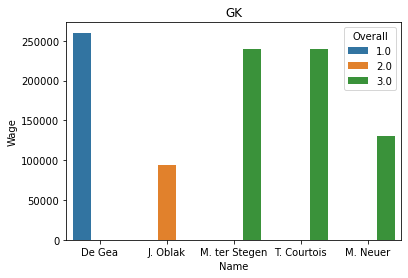

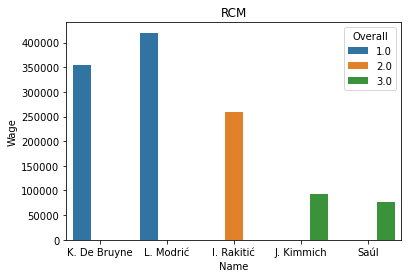

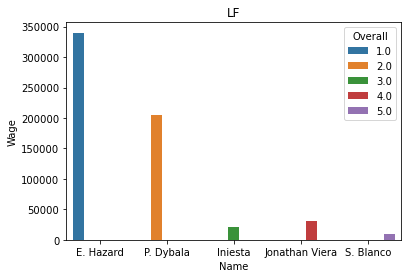

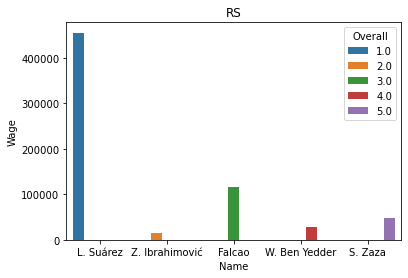

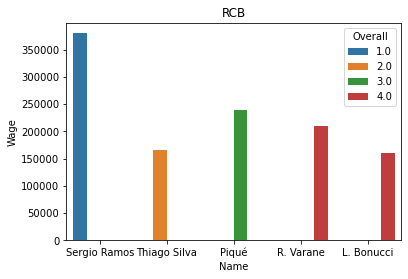

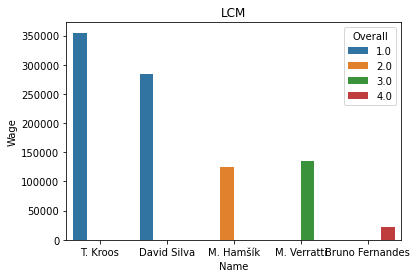

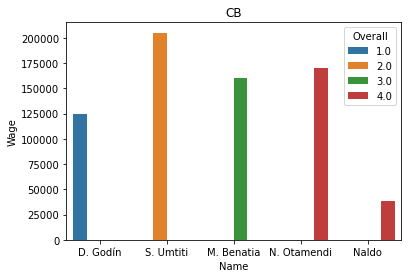

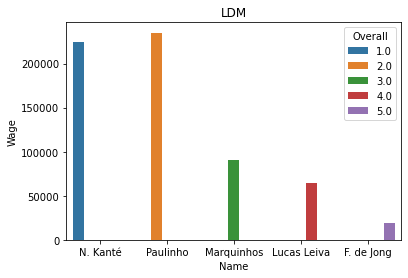

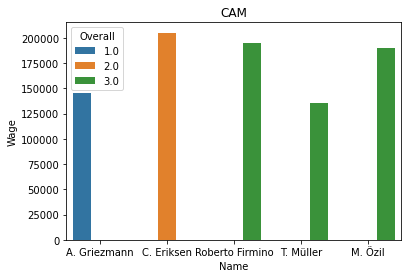

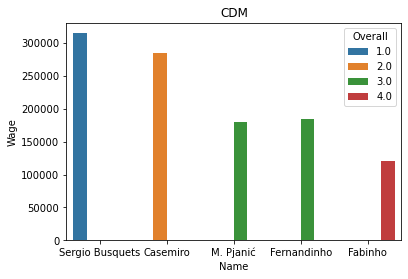

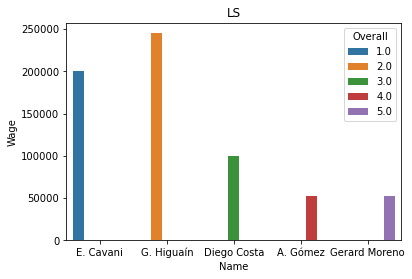

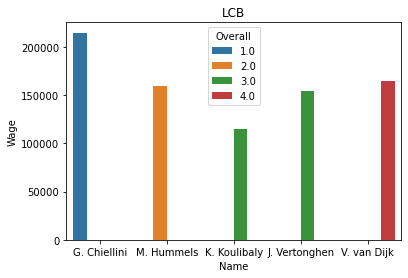

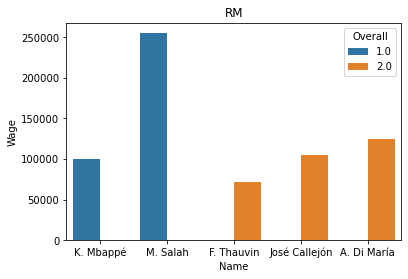

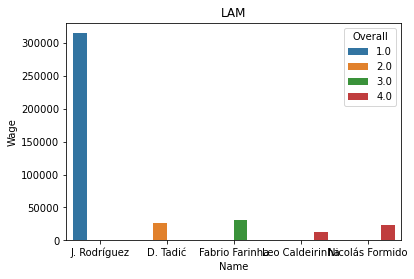

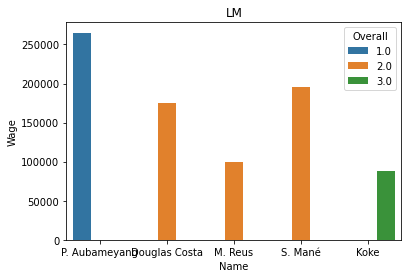

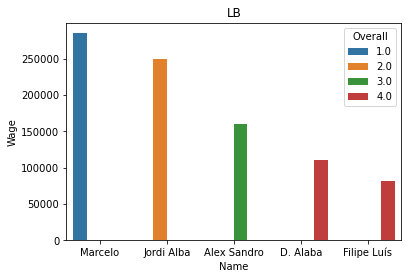

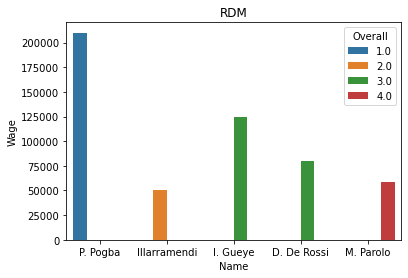

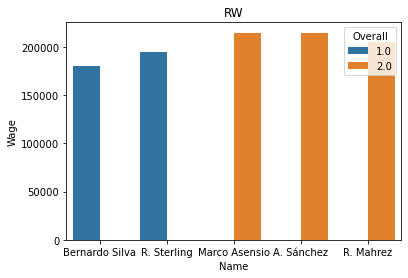

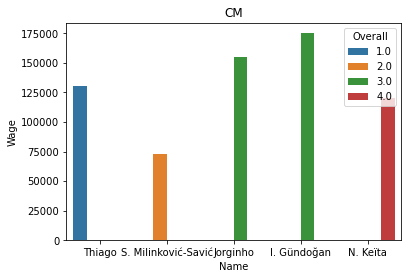

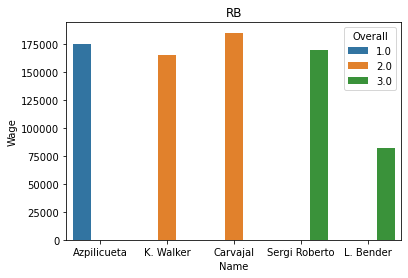

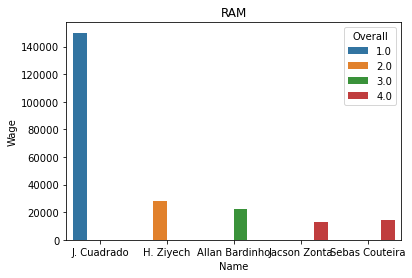

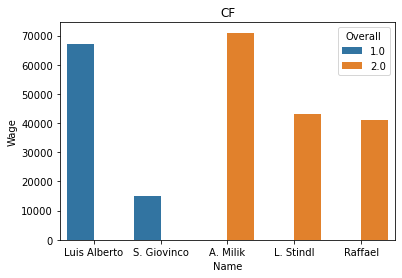

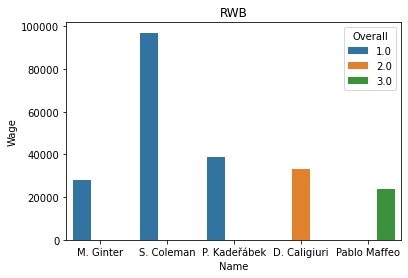

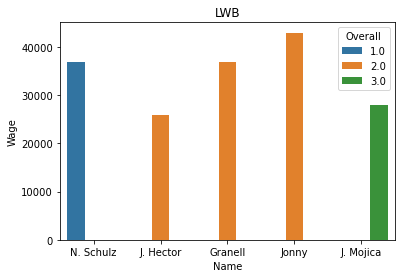

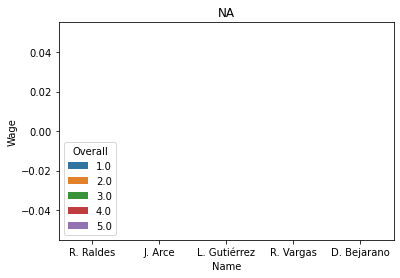

In [57]:
# top 5 players wages and name vs position.
for i in pos:
    k=z[z['Position']==i]
    plt.figure(i)
    plt.title(i)
    sns.barplot(x=k['Name'],y=k['Wage'],hue=k['Overall'].rank(method='dense',ascending=False))